In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup, SoupStrainer

import time
import timeit

from pymongo import MongoClient

import requests

import cProfile
import pstats
import pdb

import networkx as nx
import nxpd as nxpd

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
client = MongoClient('mongodb://localhost:27017/')

unused='''
#startup

#mongo

#browser

from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
firefox_capabilities = DesiredCapabilities.FIREFOX

firefox_capabilities['marionette'] = True
firefox_capabilities['binary'] = '/home/ubuntu/firefox/firefox'

capstone_profile = webdriver.FirefoxProfile('/home/ubuntu/.mozilla/firefox/a64vis0x.capstone')

browser = webdriver.Firefox(capstone_profile, capabilities=firefox_capabilities)

#browser = webdriver.PhantomJS()

#logging in
url = 'https://www.goodreads.com/'
browser.get(url)
username = browser.find_element_by_id('userSignInFormEmail')
password = browser.find_element_by_id('user_password')
with open('login.txt') as f:
    login = f.read().split('\n')

username.send_keys(login[0])
password.send_keys(login[1])
#signIn = browser.find_element_by_xpath("/html[@class='desktop no-touchevents cssanimations flexbox flexwrap csstransforms es5date es5array es5object strictmode es5function es5string json es5undefined es5syntax es5']/body[@id='signedOutHome']/div[@class='content']/div[@id='siteheader']/div[@class='mainContent']/div[@id='navBar']/div[@id='signInForm']/form[@id='sign_in']/div[@class='formBox'][3]/input[@class='gr-button gr-button--dark']")
signIn = browser.find_element_by_xpath("//input[@value='Sign in'][@type='submit']")
signIn.click()
# now we are logged in
'''

In [3]:
cookies = cookies()

NameError: name 'cookies' is not defined

In [67]:
#making sure cookies work
url='https://www.goodreads.com/friend/user/7607437'
soup = BeautifulSoup(requests.get(url,cookies=cookies).content, 'lxml')
soup.select_one('.smallText')

<span class="smallText">\n(showing 1-30 of 238)\n</span>

In [70]:
# setting up mongodb

In [4]:
db = client['goodreads']

In [5]:
friends = db['friends']
ratings = db['reviews']

In [75]:
curUserID = 7607437

In [ ]:
searchIDs = snowballSample(curUserID, 2, 0.05)

In [79]:
g = nx.from_dict_of_lists(adj_dict)

adj_dict_cleaned = {}
for id in adj_dict:
    adj_dict_cleaned[id] = filter(lambda l: l in adj_dict , adj_dict[id])

In [80]:
g = nx.from_dict_of_lists(adj_dict_cleaned)
len(g.nodes())

23831

In [44]:
simple_adj_dict = {
    0: [1,2],
    1: [0,2],
    2: [0,1,3],
    3: [2,4],
    4: [3],
}

g2 = nx.from_dict_of_lists(simple_adj_dict)

In [233]:
#nx.draw(g, node_size=10, alpha=0.25)

In [1]:
nx.draw_networkx?

Object `nx.draw_networkx` not found.


In [81]:
len(adj_dict)

23831

In [82]:
friendCounts = []
for i, id in enumerate(adj_dict):
    friendCounts.append(len(adj_dict[id]))
    if i % 1000 == 0:
        print i

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [83]:
friendCounts = np.array(friendCounts)

In [85]:
(friendCounts>1).mean()

0.22093072049011792

In [29]:
deg = g.degree()

In [240]:
to_keep = [id for id in deg if deg[id] > 40]

In [241]:
gTrunc = g.subgraph(to_keep)

In [242]:
len(gTrunc.nodes())

195

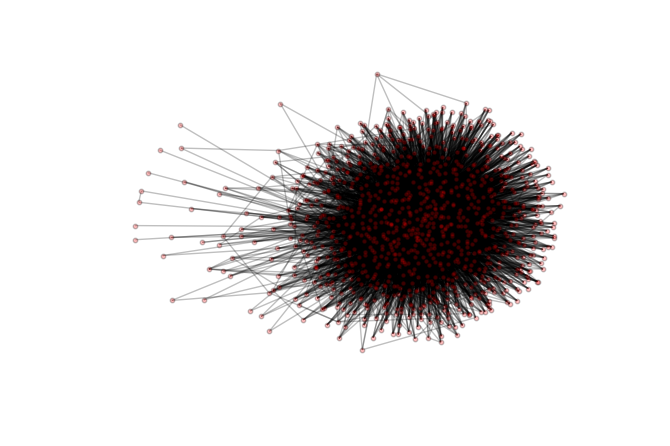

In [24]:
nx.draw(g, node_size=10, alpha=0.25)

In [91]:
nx.average_clustering(g)

0.08971100396036168

In [92]:
nx.transitivity(g)

0.01650275316252838

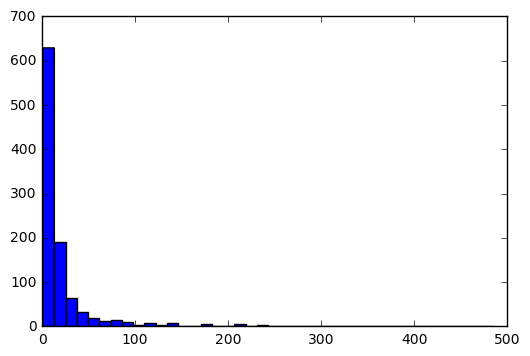

In [86]:
plt.hist(deg.values(), bins=40);

In [37]:
def get_cdf(a):
    sortedVals = np.sort(a)
    yvals = np.arange(len(sortedVals))/float(len(sortedVals))
    return sortedVals, yvals